# Phys 260 Python Lab 4: Visualization with MatPlotLib in review (10 points)

# Introduction

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST -- see your feedback in html (launch a browser)*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9a EST**

*Homework typically graded by Thursday 5p -- see your feedback in html (launch a browser)*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  

## Preflight summary
- Brief review of relaxing a potential, now with a dipole in 2d
- Visualizing results, getting to know the matplotlib tools

In [2]:
# Import relevant modules
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm                 # allows us to choose a variety of colormaps
from mpl_toolkits.mplot3d import Axes3D    # this is a special library to plot in 3d

## Brief review of relaxing a potential with a dipole in 2d (5 points)

- Create a 2d meshgrid sampling points in space 
- Create a scalar field for the potential of a dipole through iterative relaxation
- Create a vector field for the corresponding electric field

First, let us set up a square of meshgrid points.  Due to the `streamplot` expectation of `'xy'` indexing, we'll also generate meshgrid points with the same conventions.  

In [53]:
# Generate coordinates of the positions we sample in our field.
square_points_1d = np.linspace(-2,2,400)
x_points, y_points = np.meshgrid(square_points_1d, square_points_1d)

## Quick aside on variable scopes

One things we did not discuss yet, is the [scope of a variable](https://www.w3schools.com/python/python_scope.asp) (see link for more examples, or [this tutorial](https://www.datacamp.com/community/tutorials/scope-of-variables-python) for some nice visualizations).  Below, we illustrate what happens to an `int`, a `list`, a `tuple`, and an `np.ndarray` when passed into a function.  

In [31]:
# Illustration of variable scope 
test_int = 20
test_list = [1, 3, 'blah']
test_tup = (1,100,1000)
test_array = np.arange(10)

def try_to_change_things(int_arg, list_arg, tup_arg, array_arg) :
    """Changes each input argument and prints the change made in the function"""
    int_arg = int_arg + 1
    int_arg += 1
    
    list_arg.append('blue') # Tries a list operation, appending is a method of the object
    list_arg += ['green']
    list_arg = ['red', 'apple']  # Tries to change the entire list, but this reassigns the 
                                    # name list_arg (in the function) to point to this other list
    
    tup_arg = (2, 200, 2000)
    
    array_arg[0] = 100 # Tries to change one element, setting an element has an under the 
                            # hood __setitem__ method
    array_arg = np.arange(20)  # Tries to change the entire array
    print('From inside the scope of the function:')
    print(int_arg, list_arg, tup_arg, array_arg)
    
# Execute the function
try_to_change_things(test_int, test_list, test_tup, test_array)

print('From outside the scope of the function:')    
print(test_var, test_list, test_tup, test_array)

From inside the scope of the function:
22 ['red', 'apple'] (2, 200, 2000) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
From outside the scope of the function:
20 [1, 3, 'blah', 'blue', 'green'] (1, 100, 1000) [100   1   2   3   4   5   6   7   8   9]


**Open question** (1 points): What changes for which objects made it outside the function scope?  

Bonus: Why?  Note, this has to do with mutable vs. immutable objects in python (recall preflight 1), and how objects are passed into functions.  This is a whole topic itself, but if you're looking to delve more deeply, various articles, or [stackoverflow posts](https://stackoverflow.com/questions/986006/how-do-i-pass-a-variable-by-reference) have explanations.  The main thing I'd like you to get out of this is that there are in fact differences, and you'll want to be mindful of these differences when writing code.  

**Answer**: The appending to the list and the element change (equivalent to the `__setitem__` method) to the array made it outside the function scope.  This has to do with the fact that lists are mutable and integers are immutable. 

### Dipole conditions (1 points)

Below, we write a function to set the dipole initial conditions.  We will eventually set the bounds to be equal and opposite along the x-axis (i.e. on the horizontal line closest to $y=0$), and equidistant from the origin and square edges.  But, the function below is agnostic to the actual positions, and assumes arguments that will specify the array element locations of the dipole.  Let the positive potential, $V_+=100$, and the negative potential, $V_-=-100$ respectively sit on the positive and negative sides of the x-axis.  

In [97]:
def set_dipole_conditions(potential_array, dipole_plus_index, dipole_minus_index, 
                          potential_plus=100, potential_minus=-100) :
    """Returns potential array with set boundary conditions.  

    Inputs:
    potential_array (n-darray) : array containing the potential at each sampled point 
    dipole_plus_index (tuple) : index of the point corresponding to the plus 
    dipole_minus_index (tuple) : index of the point corresponding to the plus 
    potential_plus (float) : value of positive peak in potential
    potential_minus (float) : value of negative peak in potential

    Outputs:
    potential_array (n-darray) : array containing the potential at each sampled point with boundary conditions 
    """
    # Assign the potential_plus value to the correct element in potential_array
    potential_array[dipole_plus_index] = potential_plus

    # Assign the potential_minus value to the correct element in potential_array
    ### BEGIN SOLUTION
    potential_array[dipole_minus_index] = potential_minus
    ### END SOLUTION
    
    return None # Note that None is the **default** return value for any function

In [42]:
"""Execute to check you're on the right track"""
test_2d_array = np.arange(10)
test_2d_array = test_2d_array.reshape(2,5)
set_dipole_conditions(test_2d_array, (0,0), (-1,-1))
assert((test_2d_array == np.array([[100,1,2,3,4],[5,6,7,8,-100]])).all())

## Execute a function to change values in an array (2 points)

Now we relax the potential....  Fill out the function below as you did for the last tutorial/hw.  

Note, there is a difference in how you will set the boundary conditions with `set_dipole_conditions`.  You do not have a return value from the `set_dipole_conditions`.   Simply executing the function will change the input potential. 

In [88]:
def relax_potential_dipole( potential_array, dipole_plus_index, dipole_minus_index, 
                          potential_plus=100, potential_minus=-100) :
    """Returns relaxed 2-d dipole potential array with set boundary conditions.  

    Inputs:
    potential_array (n-darray) : array containing the potential at each sampled point 
    dipole_plus_index (tuple) : index of the point corresponding to the plus 
    dipole_minus_index (tuple) : index of the point corresponding to the plus 
    potential_plus (float) : value of positive peak in potential
    potential_minus (float) : value of negative peak in potential

    Outputs:
    relaxed_potential (n-darray) : array containing the relaxed potential at each sampled point with boundary conditions set     
    """

    # Define potential_left, right, top, and bottom
    potential_bottom = np.roll(potential_array, -1, axis=0)
    potential_top = np.roll(potential_array, 1, axis=0)
    potential_left = np.roll(potential_array, -1, axis=1)
    potential_right = np.roll(potential_array, 1, axis=1)
    
    relaxed_potential = np.mean(np.array([potential_left, potential_right, 
                                          potential_top, potential_bottom]),axis=0)
    assert(relaxed_potential.shape == potential_array.shape)
    
    # Set boundary conditions
    ### BEGIN SOLUTION
    set_dipole_conditions(relaxed_potential, dipole_plus_index, dipole_minus_index, 
                          potential_plus=100, potential_minus=-100)
    ### END SOLUTION
    
    return relaxed_potential

In [89]:
"""Execute to check you're on the right track"""
relax_test = relax_potential_dipole(np.zeros(x_points.shape), (0,0), (-1,-1))
assert(relax_test.shape == x_points.shape )
### BEGIN HIDDEN TESTS
assert(relax_test[0,0] == 100)
assert(relax_test[-1,-1] == -100)
assert(relax_test[-3,-3] == 0)
### END HIDDEN TESTS

### Find the dipole positions (1 point)
Now, we use both functions to iteratively relax the potential.  First, we identify the appropriate indices for the `dipole_plus_index` and the `dipole_minus_index`.  Recall, we will set the dipole along the x-axis (i.e. on the horizontal line closest to $y=0$), and equidistant from the origin and square edges.  

The boolean corresponding to the former is written out.  You will need to fill in the boolean, `x_axis_bool`, that will identify the line of points closest to $y=0$. *Hint* the `np.min` and `np.abs` functions may be useful here to use on `y_points`.  

We can then, we can use both booleans to identify the dipole indices.  While this is slight overkill since we know there are 400 points in each direction, this is a good exercise to walk through the logic of `np.where`.      

In [90]:
# Boolean to identify the lines equidistant from the x=0 and left and right edges
distance_to_midpoints = np.abs(np.abs(x_points) - x_points.max()/2)
x_midpoint_bool = distance_to_midpoints == np.min(distance_to_midpoints)

# Define the boolean, x_axis_bool to identify the line closest to y=0
### BEGIN SOLUTION
x_axis_bool = y_points == np.min(np.abs(y_points))
### END SOLUTION

#  Use both boolean statements to collect the dipole indices
dipole_indices = np.where(x_axis_bool & x_midpoint_bool)
print(dipole_indices)
dipole_indices_left = (dipole_indices[0][0], dipole_indices[1][0])
dipole_indices_right = (dipole_indices[0][1], dipole_indices[1][1])
print('dipole indices: ', dipole_left, dipole_right)   # Note the difference in indexing due to 'xy' conventions
print('x coordinate of the left dipole:', x_points[dipole_left])
print('y coordinate of the left dipole:', y_points[dipole_left])
print('x coordinate of the right dipole:', x_points[dipole_right])
print('y coordinate of the right dipole:', y_points[dipole_right])


(array([200, 200]), array([100, 299]))
dipole indices:  (200, 100) (200, 299)
x coordinate of the left dipole: -0.9974937343358397
y coordinate of the left dipole: 0.005012531328320691
x coordinate of the right dipole: 0.9974937343358397
y coordinate of the right dipole: 0.005012531328320691


In [95]:
"""Execute to check you're on the right track -- Note, if you're stuck from the above, 
you can directly input the indices below in place of dipole_left 
and dipole_right when executing relax_potential_dipole"""

assert(dipole_left == (200,100))
assert(dipole_right == (200,299))

In [101]:
convergence_criterion = 0.01
largest_iteration_difference = 1 # initialize

# Initialize the potential
potential_2d_dipole = relax_potential_dipole(np.zeros(x_points.shape), dipole_left, dipole_right)

while largest_iteration_difference > convergence_criterion :
    relaxed_potential = relax_potential_dipole(potential_2d_dipole, dipole_left, dipole_right)

    largest_iteration_difference = np.max(np.abs(relaxed_potential - potential_2d))
    potential_2d_dipole = relaxed_potential

Now, we create the electric field

In [105]:
dipole_electric_field = -np.array([np.gradient(potential_2d_dipole, axis=0), 
                                               np.gradient(potential_2d_dipole, axis=1)])

## Visualize results (5 points)

Matplotlib can be kind of clunky in how the object methods are handled.  While there are smoother tools (e.g. [seaborn](https://seaborn.pydata.org/) is a relatively recent favorite), it is more common to get a solid start on some nice looking visualizations with matplotlib, online documentation (and stackoverflow), and the [matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html).

- First, we'll compare visualizations of the scalar field, `potential_2d_dipole`, with `imshow` and in 3d.  We'll see a commonality in the use of colorbars.
- Second, we'll compare `imshow` and the `contour` plot
- Finally, we'll take a look at the pieces that go into `streamplot`.

### Change a keyword (1 point)

Modify the code below - look up some of the [colormaps in matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html), and change the keyword `cmap` to something of your choice. 

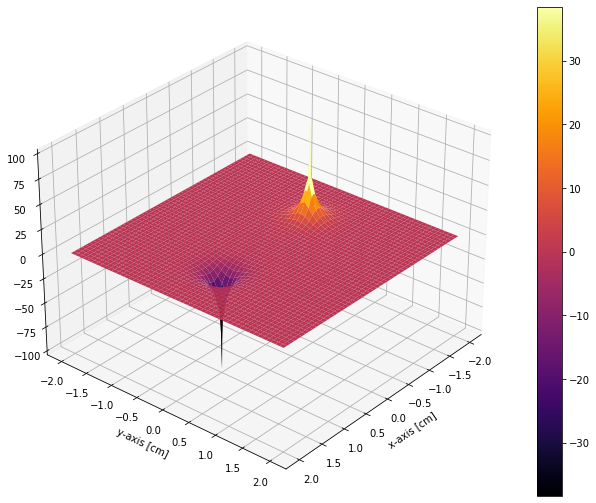

In [133]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d') # We set the current axes to be a projection in 3d
surf = ax.plot_surface(x_points,y_points,potential_2d_dipole, cmap=cm.inferno)
fig.colorbar(surf)
ax.set_ylabel('y-axis [cm]')
ax.set_xlabel('x-axis [cm]')
ax.view_init(30, 40)

Below, we show the same plot with `imshow`.  You'll notice that `colorbar` (as in the previous cell) is a method of the `fig` (or figure object) not the `ax` (or axes) object.  We can't place a colorbar directly on the axis, but have to place it on the overall figure.  You'll notice that the colorbar takes in a mappable as an argument - it needs to know what colors it maps onto.  In our case, the mappable is the *returned* instance of the of ax.imshow(....) that we executed, which we named `image_on_axes`.  Note, we would still be able to render the `imshow` image by just executing it, we would just not be able to use the last line in the cell.

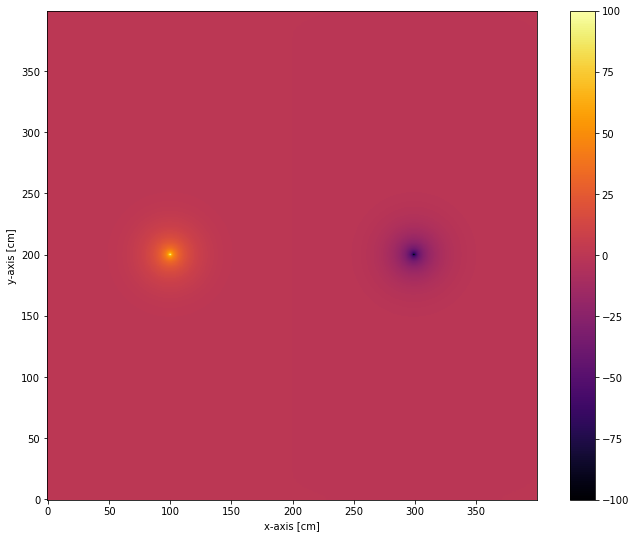

In [128]:
fig, ax = plt.subplots(1,1,figsize=(12,9))

image_on_axes = ax.imshow(potential_2d_dipole, origin='lower', cmap=cm.inferno)   
ax.set_ylabel('y-axis [cm]')
ax.set_xlabel('x-axis [cm]')

fig.colorbar(image_on_axes)

## Contour plots

A new plot you saw in the last tutorial/hw is the contour plot.  Below we make a base contour plot of equipotential lines.

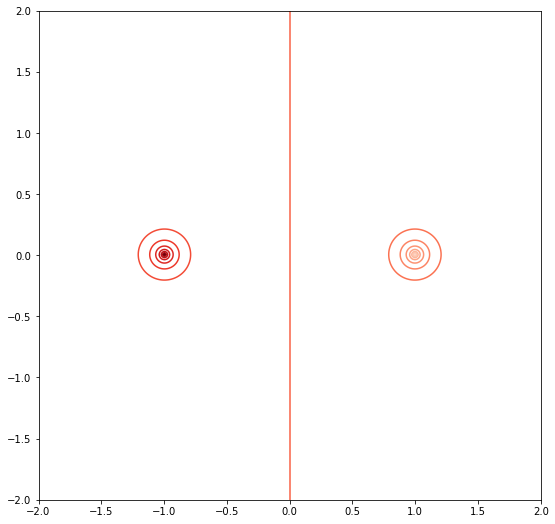

In [138]:
fig, ax = plt.subplots(1,1,figsize=(9,9))
ax.contour(x_points, y_points, potential_2d_dipole, levels=np.arange(-100,100,10),cmap=cm.Reds)

### Refine a plot (2 points)
Now, remake the plot to be more readable:
- change the input kwarg `levels` to take in values that are log spaced - so there are lines at $\pm 0.001, 0.01, 0.1, 1, 10$.  Define this as `logged_levels`. (Depending on how you define `logged_levels` to input into `levels`, you may get an error.  Try working through the error message starting from the bottom.  Note, you should be able to input a list of numbers, i.e. `logged_levels` can be a list. )
- change the colormap to a different one (you may find yourself only seeing very light colors because of the log spacing - try to pick a darker one for visibility, but there are ways to log space the colors as well)
- look at the 30th code cell from the last tutorial/hw to add labels to the contours. *Hint*: the method to label the contours is a method of the axes object, but you need a mappable as the first argument as you did in the previous plots for the colorbar.

<a list of 12 text.Text objects>

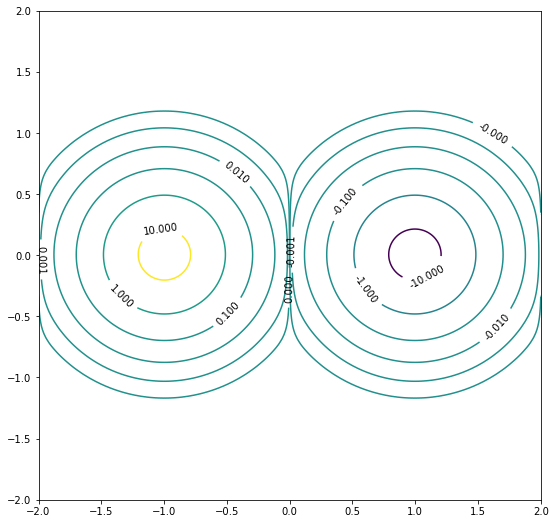

In [164]:
# Make your refined plot here, first defining logged_levels
### BEGIN SOLUTION
fig, ax = plt.subplots(1,1,figsize=(9,9))
logged_levels = [-10,-1,-0.1,-0.01,-0.001,-0.0001, 0.0001, 0.001,0.01,0.1,1,10]
contour1 = ax.contour(x_points, y_points, potential_2d_dipole, 
           levels=levels,
           cmap=cm.viridis)
ax.clabel(contour1, fontsize=10, colors='black')  
### END SOLUTION

## Subplots for side-by-side plotting (1 point)

Use `plt.subplots` for side-by-side plotting of the above two figures, plotting the contour plot on the left and the imshow plot on the right.  Hint:  See the use of this in the 10th code cell of tutorial/hw 3, and you should be mostly able to copy and paste code from above for each subplot that goes on their respective axis.

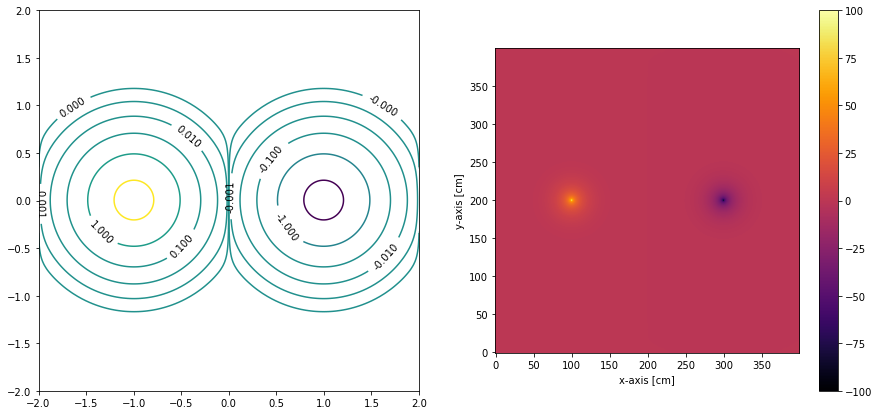

In [165]:
# Plot the previous two plots side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
### BEGIN SOLUTION
contour1 = ax1.contour(x_points, y_points, potential_2d_dipole, 
           levels=logged_levels,
           cmap=cm.viridis)
ax1.clabel(contour1, fontsize=10, colors='black')  

image_on_axes = ax2.imshow(potential_2d_dipole, origin='lower', cmap=cm.inferno)   
ax2.set_ylabel('y-axis [cm]')
ax2.set_xlabel('x-axis [cm]')

fig.colorbar(image_on_axes)
### END SOLUTION

## Let's visualize both the scalar field and the vector field 
We will use both `contour` and `streamplot` on the same axis.  You'll need to fill in the portion for streamplot.  Recall, streamplot expects `xy` conventions, which our `x_points` and `y_points` are already defined with.  However, our `dipole_electric_field` does not assume these conventions.  *Hint:* If your streamplot looks funny to you (given what you know about the directions the field lines around a dipole should look like), then try switching around how you are using `dipole_electric_field`.

Text(0, 0.5, 'y-axis ')

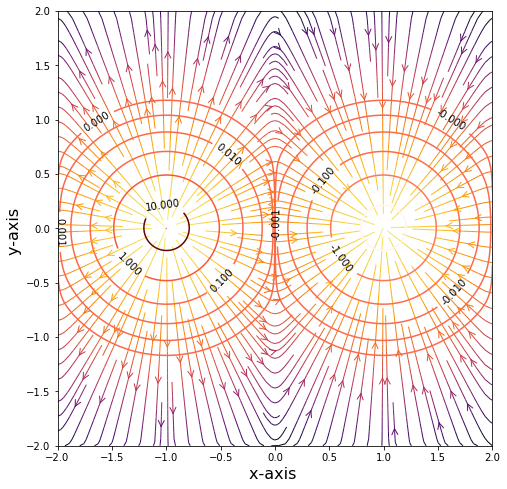

In [169]:
emagnitude = 10*np.log(np.linalg.norm(dipole_electric_field, axis=0)) # We will color code by this

fig, ax = plt.subplots(1, figsize=(8,8))

# Use streamplot on the axis to visualize the electric field
### BEGIN SOLUTION
ax.streamplot(x_points, y_points,  
              dipole_electric_field[1], dipole_electric_field[0], 
              color=emagnitude, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
### END SOLUTION
contour1 = ax.contour(x_points, y_points, potential_2d_dipole, 
                      levels=logged_levels,cmap=plt.cm.Reds)
ax.clabel(contour1, fontsize=10, colors='black')  # label the contours

ax.set_aspect('equal')
ax.set_xlabel('x-axis ', fontsize=16)
ax.set_ylabel('y-axis ', fontsize=16)